In [1]:
import os
import time
import itertools
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

from scipy.stats import entropy

In [2]:
with open('deepgg-combined.pkl', 'rb') as read_handle:
    C = pickle.load(read_handle)

In [3]:
keys = list(C.keys())
keys_dfs = [key for key in keys if '_dfs' in key]
keys_bfs = [key for key in keys if '_bfs' in key]
keys_process = [key for key in keys if '_process' in key]
keys_erdos_renyi = [key for key in keys if 'erdos_renyi' in key]
keys_barabasi_albert = [key for key in keys if 'barabasi_albert' in key]
keys_watts_strogatz = [key for key in keys if 'watts_strogatz' in key]
keys_er_and_bfs = [key for key in keys if 'erdos_renyi' in key and '_bfs' in key]
keys_er_and_dfs = [key for key in keys if 'erdos_renyi' in key and '_dfs' in key]
keys_ba_and_bfs = [key for key in keys if 'barabasi_albert' in key and '_bfs' in key]
keys_ba_and_dfs = [key for key in keys if 'barabasi_albert' in key and '_dfs' in key]
keys_ws_and_bfs = [key for key in keys if 'watts_strogatz' in key and '_bfs' in key]
keys_ws_and_dfs = [key for key in keys if 'watts_strogatz' in key and '_dfs' in key]

In [4]:
subsets = {
    'Depth-First-Search': keys_dfs,
    'Breadth-First-Search': keys_bfs,
    'Construction Process': keys_process,
    'Erdos-Renyi model': keys_erdos_renyi,
    'Barabasi-Albert model': keys_barabasi_albert,
    'Watts-Strogatz model': keys_watts_strogatz,
    'Erdos-Renyi + BFS': keys_er_and_bfs,
    'Erdos-Renyi + DFS': keys_er_and_dfs,
    'Barabasi-Albert + BFS': keys_ba_and_bfs,
    'Barabasi-Albert + DFS': keys_ba_and_dfs,
    'Watts-Strogatz + BFS': keys_ws_and_bfs,
    'Watts-Strogatz + DFS': keys_ws_and_dfs,
}

In [5]:
computation_times = np.array([C[key]['computation_time'] for key in C])

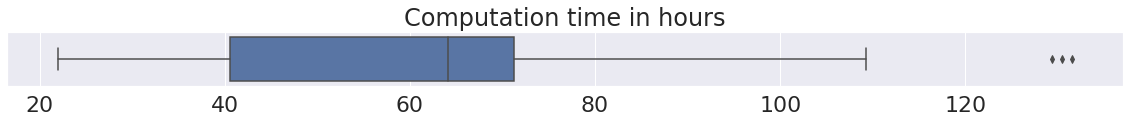

In [6]:
sns.set(style="whitegrid")
sns.set(font_scale=2)

plt.figure(figsize=(20, 1))
ax = sns.boxplot(computation_times/(60*60))
ax.set_title('Computation time in hours'.format(num=len(computation_times)))
plt.show()

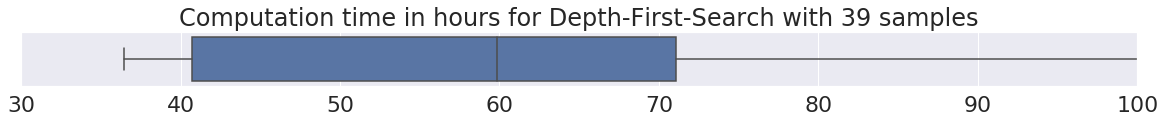

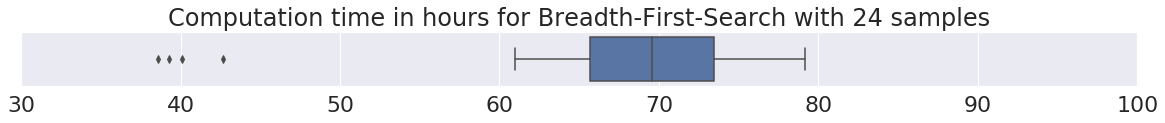

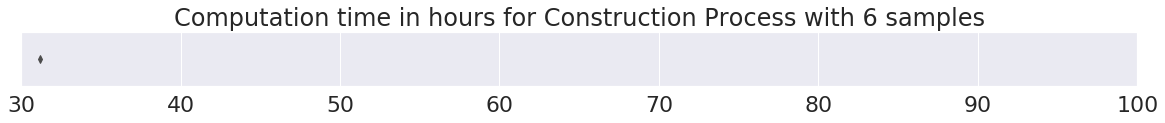

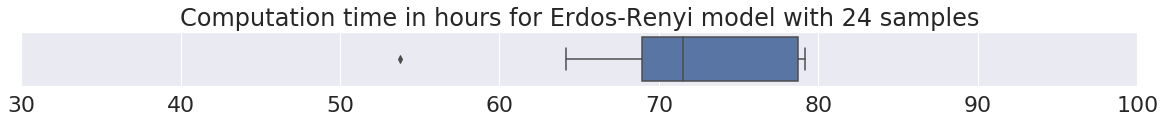

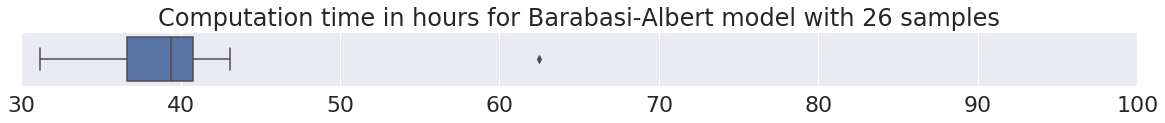

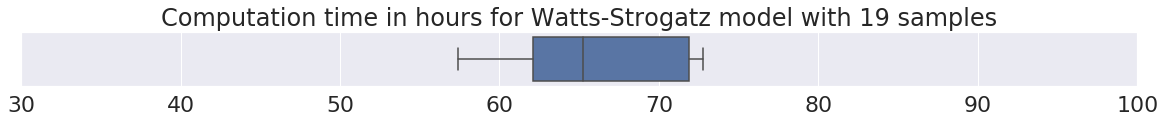

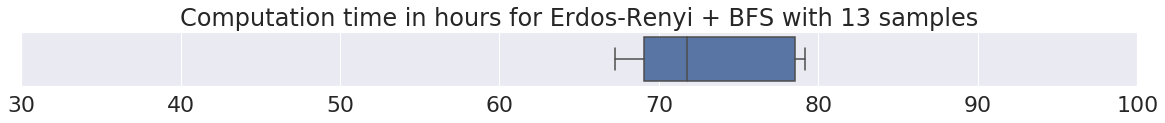

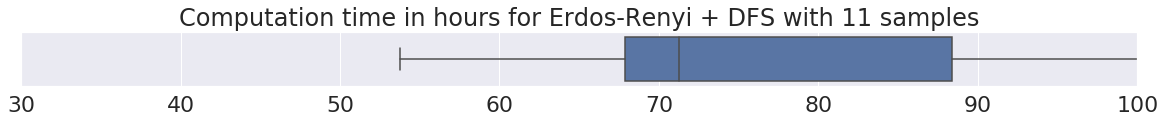

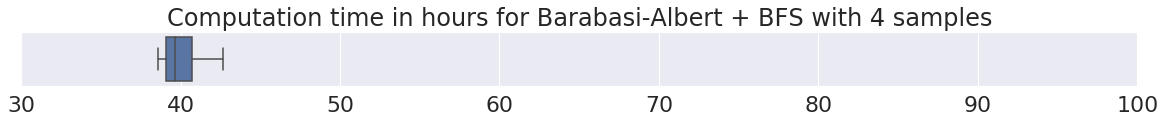

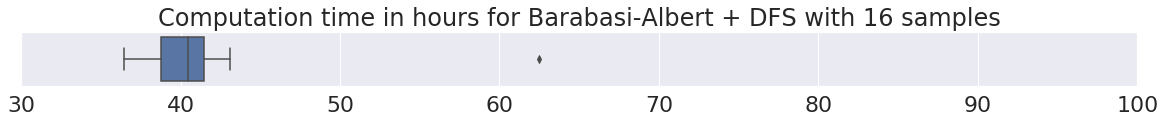

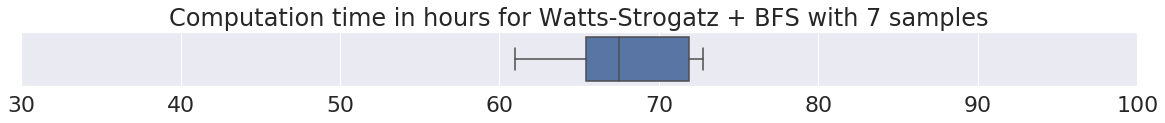

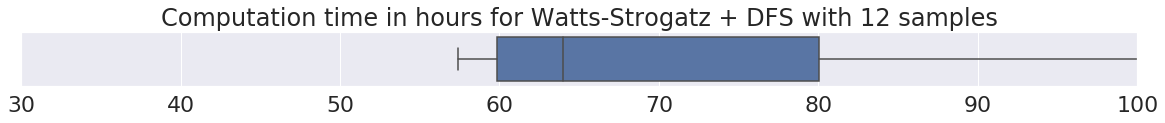

In [7]:
for subset_name in subsets:
    subset = subsets[subset_name]
    computation_times = np.array([C[key]['computation_time'] for key in subset])
    
    sns.set(style="whitegrid")
    sns.set(font_scale=2)

    plt.figure(figsize=(20, 1))
    ax = sns.boxplot(computation_times/(60*60))
    ax.set_title('Computation time in hours for {name} with {num} samples'.format(num=len(computation_times), name=subset_name))
    ax.set(xlim=(30, 100))
    plt.show()